# Field of Study vs. Occupation
Adam Ben-Aamr

12-10-2024

# Data Introduction
Many individuals enter college or university with an idea of what they want to focus their career on. However, there are many instances where these same individuals end up changeing their choice of career. I have always been curious about the factors that influence career changes. I want to explore how someone's field of study impacts their likelihood to stick with or switch their careers. According to the distributor and maintainer, this dataset is designed to help explore and predict whether individuals are likely to change their occupation based on their academic background, job experience, and other demographic factors.

It is unknown where this data origniated from and everything is completely annonymous. This could be a potential bias as it could provide the opporunity of eliminating some subset of bias. The csv file used for analysis in this project was retrieved from [Kaggle](https://www.kaggle.com/datasets/jahnavipaliwal/field-of-study-vs-occupation) uploaded by the user [Jahnavi Paliwal](https://www.kaggle.com/jahnavipaliwal) under the Apache 2.0 license.

The features that will be used in this analysis would be `Field of Study`, `Years of Expereince`, `Education Level`, `Current Occupation`, `Idustry Growth Rate`, `Job Satisfaction`, `Work-Life Balance`, `Job Opportunities`, `Salary`, `Job Security`, `Career Change Interest`, `Skills Gap`, `Family Influence`, `Mentorship Available` with the target variable being `Likely to Change Occupation`.

Attribute Information:
1. Field of Study: The area of academic focus during the individual’s education
2. Current Occupation: The individual's current job or industry they are employed in (Software Engineer, Mechanical Engineer, etc.)
3. Age: The age of the individual
4. Gender: The gender of the individual (Male, Female)
5. Years of Experience: The number of years the individual has been in the workforce
6. Education Level: The highest level of education completed by the individual (High School, Bachelor's, Master's, PhD)
7. Industry Growth Rate: The growth rate of the industry the individual works in (High, Medium, Low)
8. Job Satisfaction: A rating of the individual’s job satisfaction (1 - 10 scale)
9. Work-Life Balance: A rating of the individual's perceived work-life balance (1 - 10 scale)
10. Job Opportunities: The number of available job opportunities in the individual’s field
11. Salary: The annual salary of the individual (in USD or local currency equivalent)
12. Job Security: A rating of the individual’s perceived job security (1 - 10 scale)
13. Career Change Interest: Whether the individual is interested in changing their occupation (1 for yes, 0 for no)
14. Skills Gap: A measure of how well the individual’s current skills match their job requirements (1 - 10 scale)
15. Family Influence: The degree of influence the individual’s family has on their career choice (None, Low, Medium, High)
16. Mentorship Available: Whether the individual has access to a mentor in their current job
17. Certifications: Whether the individual holds any certifications relevant to their occupation
18. Freelancing Expereince: Whether the individual has freelanced in the past
19. Geographic Mobility: Whether the individual is willing to relocate for a job
20. Professional Networks: A measure of how strong the individual's professional network is (1 - 10 scale)
21. Career Change Events: The number of career changes the individual has made in the past
22. Technology Adoption: A measure of the individual’s comfort level with adopting new technologies (1 - 10 scale)
23. Likely to Change Occupation: Variable indicating whether an individual is likely to change their occupation (1 for likely to change, 0 for unlikely to change)

In this analytical endeavor, I will be performing a classification analysis

In [1]:
import pandas as pd
from datacleaner import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from confint import classification_confint
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning

warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Descriptive Statistics
The first step is to visually inspect the new data set and clean it up if necessary.

In [2]:
data = pd.read_csv('career_change_prediction_dataset.csv')

data.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


This exploration will focus on 14 of the 23 variables presented in this dataset: Field of Study, Years of Expereince, Education Level, Current Occupation, Idustry Growth Rate, Job Satisfaction, Work-Life Balance, Job Opportunities, Salary, Job Security, Career Change Interest, Skills Gap, Family Influence, Mentorship Available

Let's check for missing variables:

In [3]:
# Check for missing values or duplicate rows
data_quality = print_data_quality(data)

data_quality

No empty rows/cells found
No duplicate rows found


Even if it has been reported that there are no empty cells and no duplicates within the dataset, it doesn't hurt to double check manually and clean it up in the process.

In [4]:
# Remove any duplicate values
data = data.drop_duplicates()

# Removes any NaN values
data = data.dropna()

# Check for NaN values in the dataset
na_values = data.isna()

# Print the Dataset with NaN values
if na_values.any().any(): # Checks if there are any NaN values in the dataset
  print('NaN values in the dataset:')
  print(data[na_values])
else:
  print('No NaN values in the dataset')

data.head()

No NaN values in the dataset


,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


Following the completion of the data cleaning process, including the resolution of any missing (NaN) or duplicate values, the next step involves removing all irrelevant columns not pertinent to the scope of the current analysis. This step ensures the dataset is streamlined and focused on the variables of interest. Subsequently, the structure of the dataset can be examined, allowing for a comprehensive understanding of its remaining composition, including the number of rows, columns, and the specific attributes contained within the relevant columns.

In [5]:
# Drop columns not focused on for analysis
data = data.drop(['Age', 'Gender', 'Certifications', 'Freelancing Experience', 'Geographic Mobility', 'Professional Networks', 'Technology Adoption'], axis=1)

# Check to see if all columns are accurately represented and all null values have been eliminated
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28812 entries, 0 to 38443
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Field of Study               28812 non-null  object
 1   Current Occupation           28812 non-null  object
 2   Years of Experience          28812 non-null  int64 
 3   Education Level              28812 non-null  object
 4   Industry Growth Rate         28812 non-null  object
 5   Job Satisfaction             28812 non-null  int64 
 6   Work-Life Balance            28812 non-null  int64 
 7   Job Opportunities            28812 non-null  int64 
 8   Salary                       28812 non-null  int64 
 9   Job Security                 28812 non-null  int64 
 10  Career Change Interest       28812 non-null  int64 
 11  Skills Gap                   28812 non-null  int64 
 12  Family Influence             28812 non-null  object
 13  Mentorship Available         28812 n

In [6]:
data.describe()

,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,Career Change Events,Likely to Change Occupation
count,28812.000000,28812.000000,28812.000000,28812.000000,28812.000000,28812.000000,28812.000000,28812.000000,28812.000000,28812.000000,28812.000000
mean,19.598188,5.506317,5.531862,50.405387,114928.161044,5.481709,0.198494,5.526517,0.300118,1.002638,0.574344
std,11.541387,2.876454,2.881661,28.877448,48937.933936,2.866697,0.398873,2.869513,0.458317,0.815315,0.494451
min,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,3.000000,3.000000,25.000000,72703.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,20.000000,6.000000,6.000000,50.000000,114615.000000,5.000000,0.000000,6.000000,0.000000,1.000000,1.000000
75%,30.000000,8.000000,8.000000,75.000000,157279.500000,8.000000,0.000000,8.000000,1.000000,2.000000,1.000000
max,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,2.000000,1.000000


In [7]:
# Remap the int categories to str
data['Likely to Change Occupation'] = data['Likely to Change Occupation'].map({
  0: 'No',
  1: 'Yes',
})

# Count the class distribution
change_occupation = data.groupby('Likely to Change Occupation')

change_occupation.count()

,Field of Study,Current Occupation,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Family Influence,Mentorship Available,Career Change Events
Likely to Change Occupation,,,,,,,,,,,,,,,
No,12264,12264,12264,12264,12264,12264,12264,12264,12264,12264,12264,12264,12264,12264,12264
Yes,16548,16548,16548,16548,16548,16548,16548,16548,16548,16548,16548,16548,16548,16548,16548


## Exploratory analysis
### Description
In the results displayed, you can see the data has 38,444 records, each with 23 columns.

Likely to Change Occupation is a categorical variable represented with numerical values (0 indicating no and 1 indicating yes).

Missing attribute values: none

Class distribution: 16279 not likely to change occupation, 22165 likely to change occupation

## Visualize Distribution of Data
The primary objective of visualizing the data in this context is twofold: first, to identify the features that are most effective in predicting whether an individual in a specific field is likely to experience an occupational change; second, to observe general trends within the data that may inform and guide the selection of an appropriate model.

## Check for imblanaced data

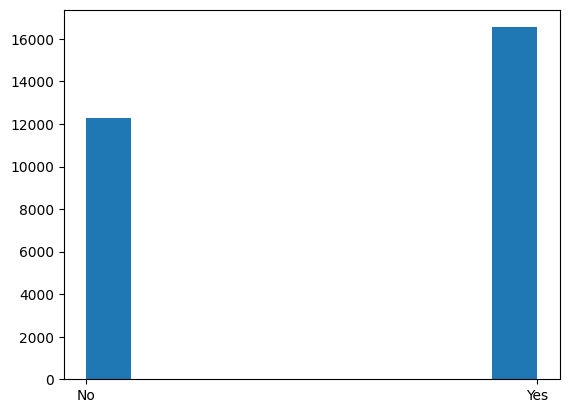

In [8]:
plt.hist(data['Likely to Change Occupation'])

# Redefine target column
data['Likely to Change Occupation'] = data['Likely to Change Occupation'].map({
  'No': 0,
  'Yes': 1,
})

The overall distribution of the data target variable is notably imbalanced, indicating that there could be other variables in this dataset that are also imblanaced.

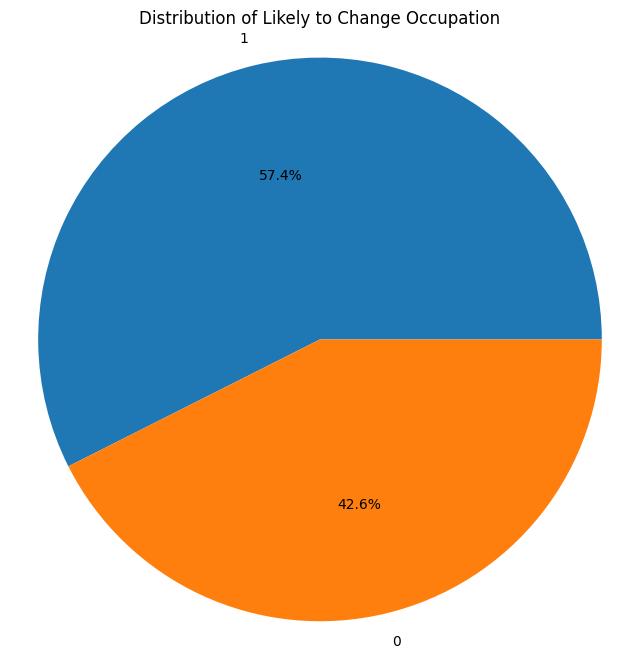

In [9]:
# View the target variable
target_counts = data['Likely to Change Occupation'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Likely to Change Occupation')
plt.axis('equal')
plt.show()

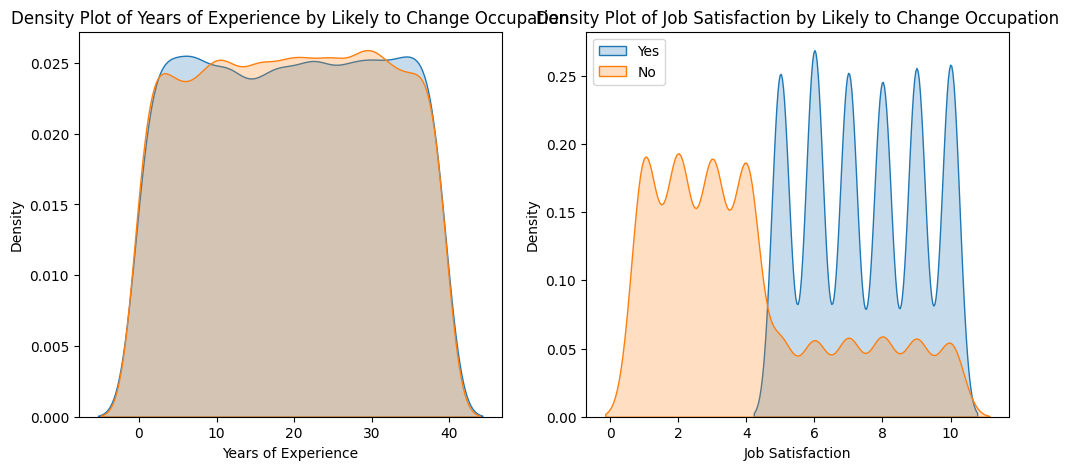

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Density plot of Years of Experience distribution
sns.kdeplot(data[data['Likely to Change Occupation'] == 0]['Years of Experience'], fill=True, label='Yes', ax=ax[0])
sns.kdeplot(data[data['Likely to Change Occupation'] == 1]['Years of Experience'], fill=True, label='No', ax=ax[0])
ax[0].set_title('Density Plot of Years of Experience by Likely to Change Occupation')

# Density plot of Job Satisfaction distribution
sns.kdeplot(data[data['Likely to Change Occupation'] == 0]['Job Satisfaction'], fill=True, label='Yes', ax=ax[1])
sns.kdeplot(data[data['Likely to Change Occupation'] == 1]['Job Satisfaction'], fill=True, label='No', ax=ax[1])
ax[1].set_title('Density Plot of Job Satisfaction by Likely to Change Occupation')
plt.legend()
plt.show()

### Heatmap of the Data

In [11]:
# Apply mappings to columns
mappings = {
  'Field of Study': {
    'Medicine': 1,
    'Education': 2,
    'Arts': 3,
    'Computer Science': 4,
    'Business': 5,
    'Mechanical Engineering': 6,
    'Biology': 7,
    'Law': 8,
    'Economics': 9,
    'Psychology': 10,
  },
  'Current Occupation': {
    'Business Analyst': 1,
    'Economist': 2,
    'Biologist': 3,
    'Doctor': 4,
    'Lawyer': 5,
    'Software Developer': 6,
    'Artist': 7,
    'Psychologist': 8,
    'Teacher': 9,
    'Mechanical Engineer': 10,
  },
  'Education Level': {
    'High School': 1,
    'Bachelor\'s': 2,
    'Master\'s': 3,
    'PhD': 4,
  },
  'Industry Growth Rate': {
    'Low': 1,
    'Medium': 2,
    'High': 3,
  },
  'Family Influence': {
    'None': 1,
    'Low': 2,
    'Medium': 3,
    'High': 4,
  },
}

# Map the columns
for column, mapping in mappings.items():
  data[column] = data[column].map(mapping)

data.head()

,Field of Study,Current Occupation,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Family Influence,Mentorship Available,Career Change Events,Likely to Change Occupation
0,1,1,7,1,3,7,10,83,198266,8,0,8,4,0,0,0
1,2,2,26,3,1,10,3,55,96803,9,0,3,3,0,1,0
2,2,3,27,3,1,8,3,78,65920,4,0,4,2,0,1,0
3,2,1,14,4,2,7,9,62,85591,5,0,2,3,1,0,0
4,3,4,0,4,1,3,1,8,43986,3,0,5,2,0,0,1


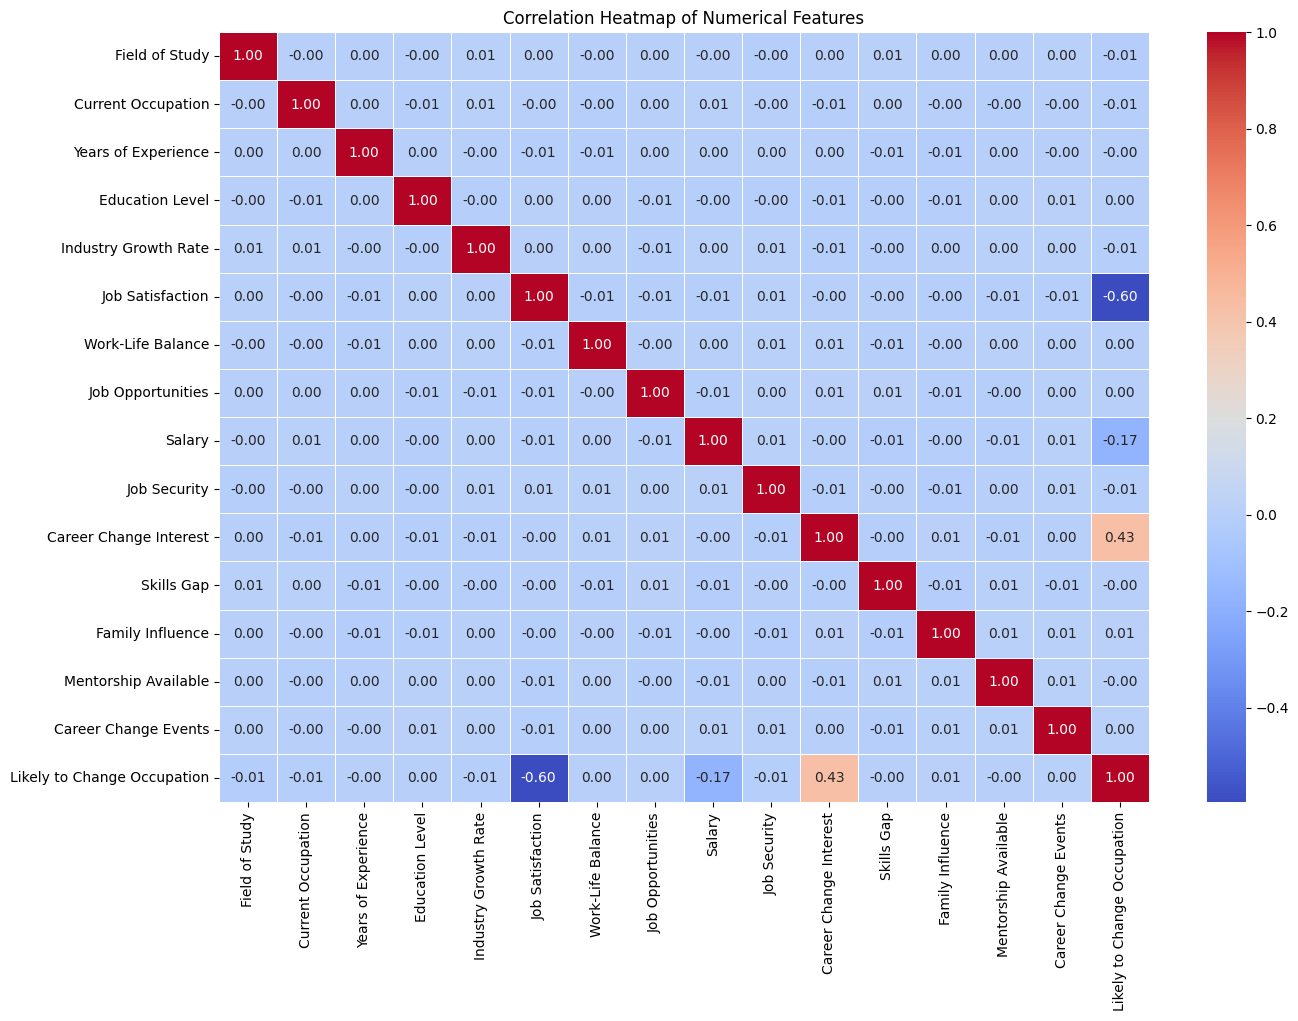

In [12]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap of Numerical Features")

# Show the plot
plt.show()

### Hypothesis
I believe topics like salary, job satisfaction, and skills gap are what influence an individual to change their career or keep it.

## Scatter Matrix

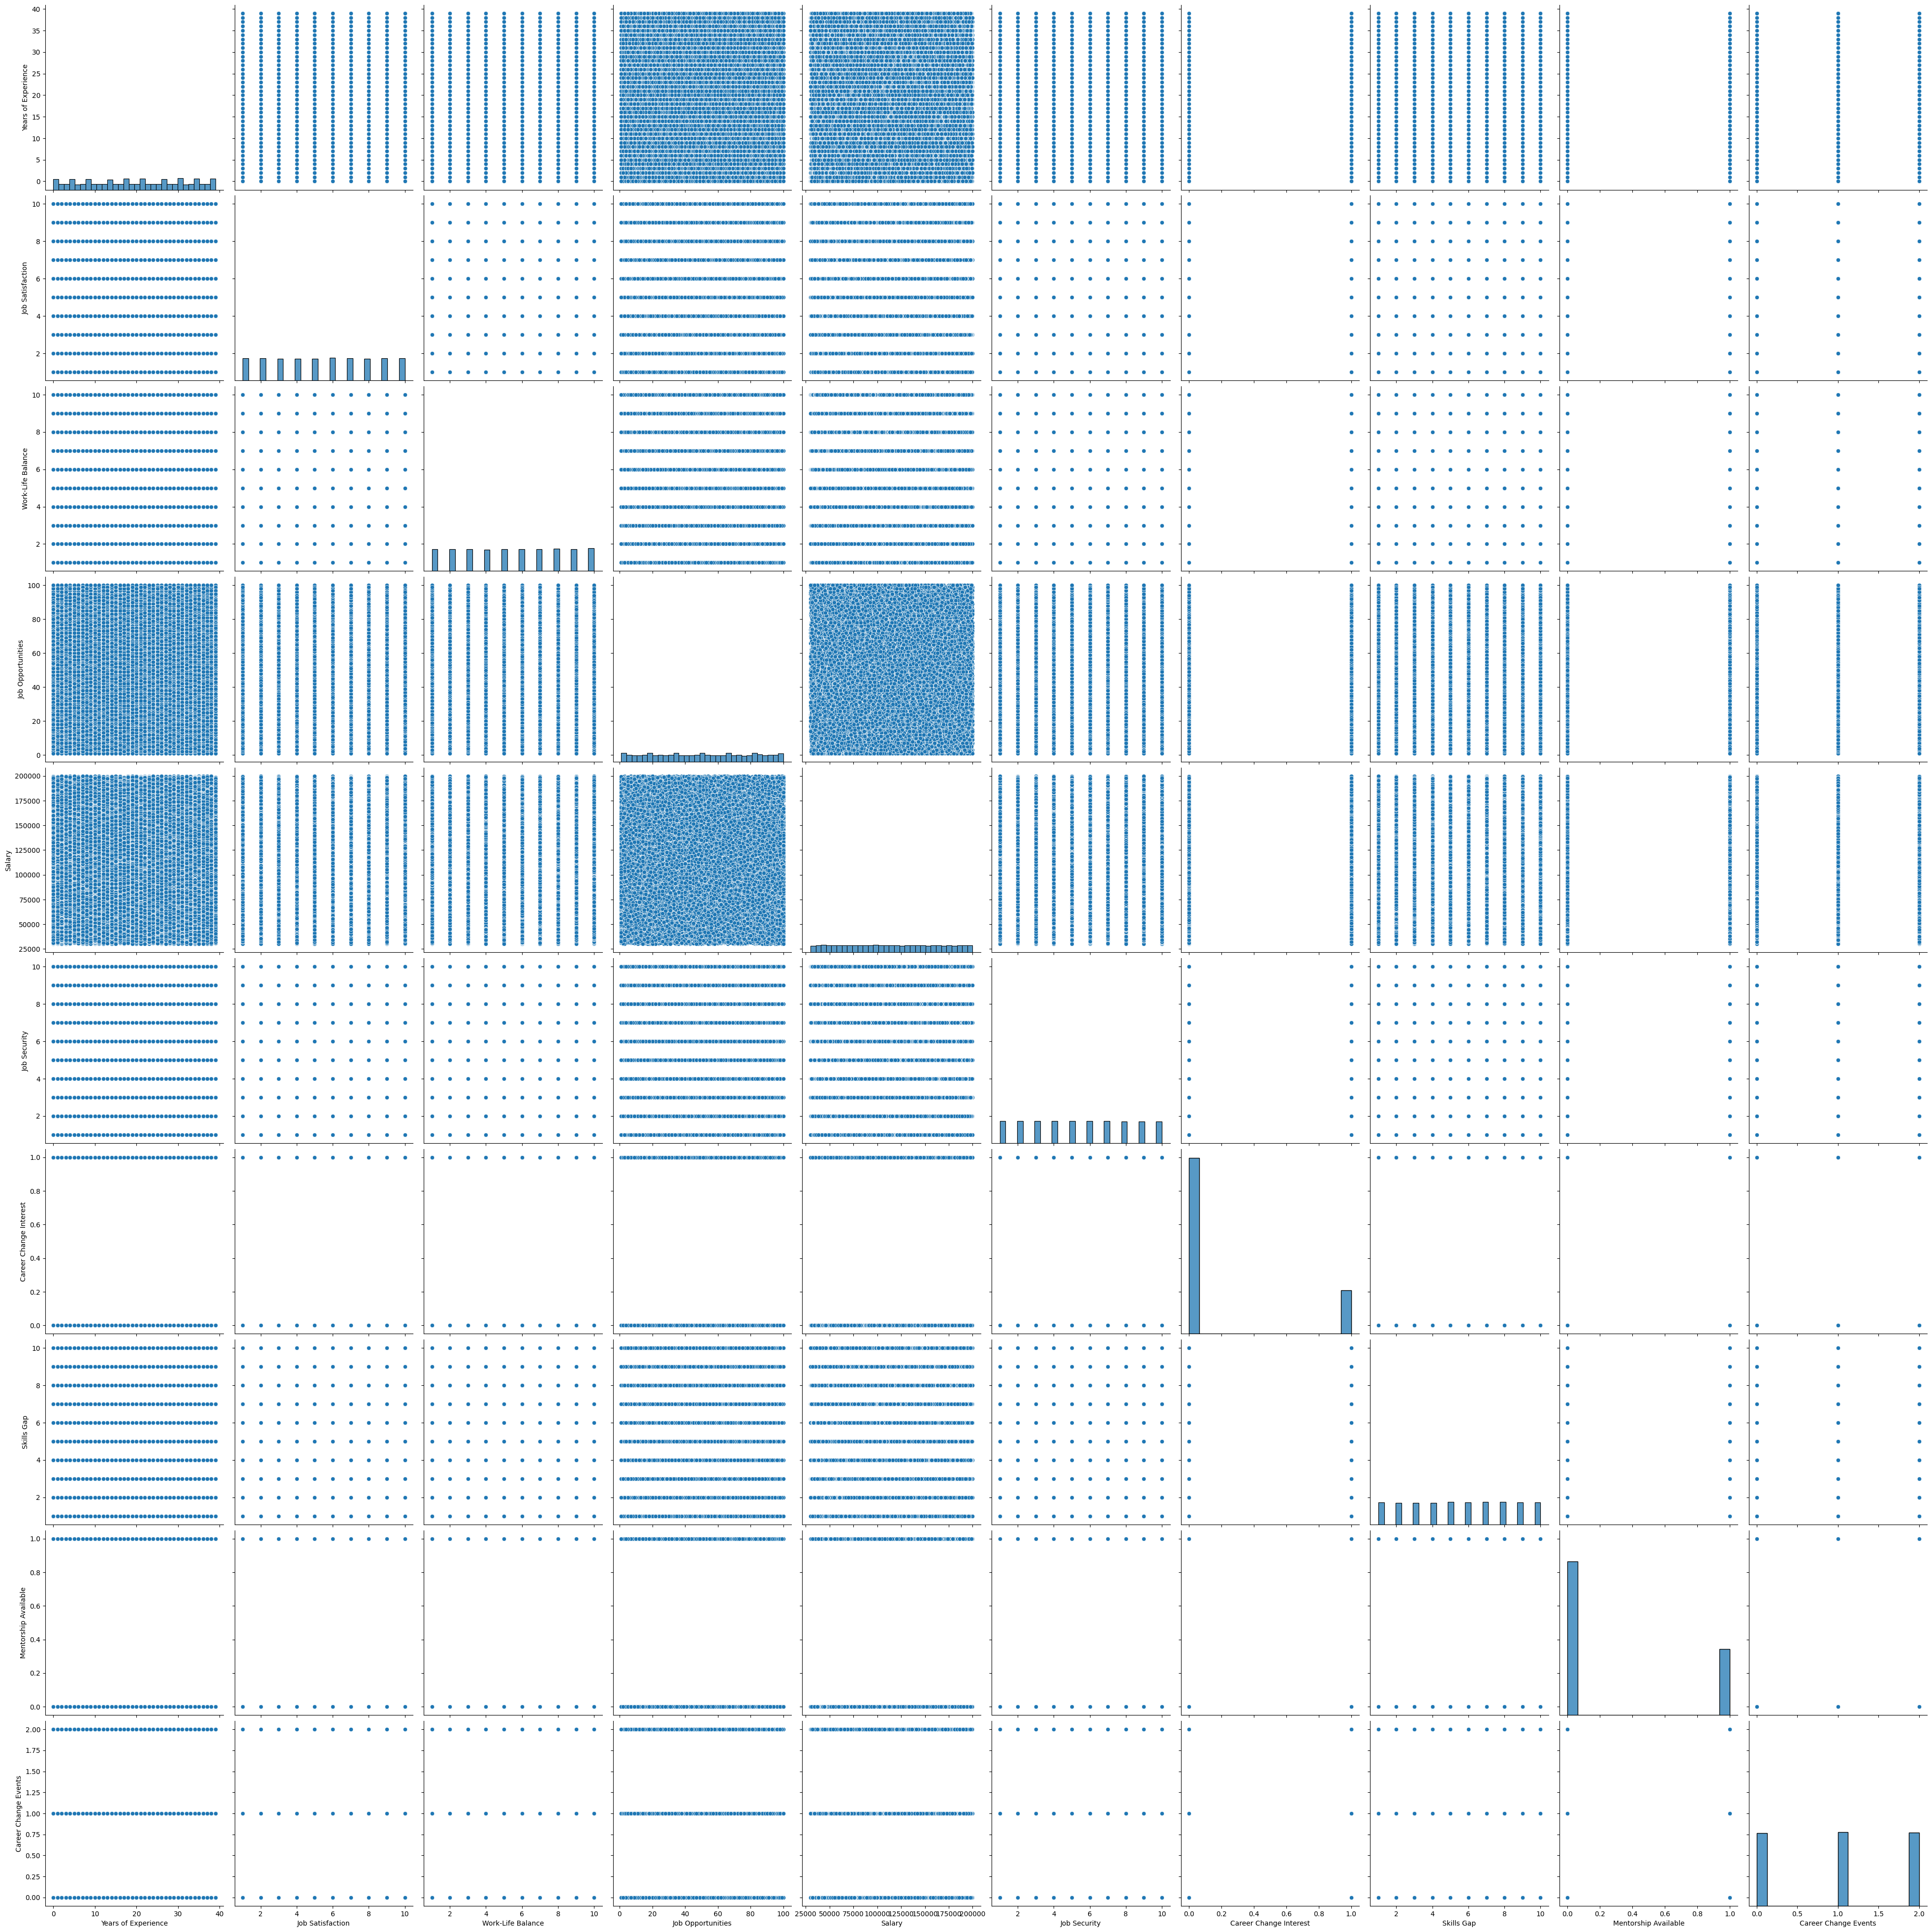

In [13]:
# Ensure 'Likely to Change Occupation' is numeric
data['Likely to Change Occupation'] = pd.to_numeric(data['Likely to Change Occupation'], errors='coerce')

# Plot the pairplot
sns.pairplot(data, vars=['Years of Experience', 'Job Satisfaction', 'Work-Life Balance', 'Job Opportunities', 'Salary', 'Job Security', 'Career Change Interest', 'Skills Gap', 'Mentorship Available', 'Career Change Events'], height=4)
plt.show()

<Axes: xlabel='Career Change Interest', ylabel='Career Change Interest'>

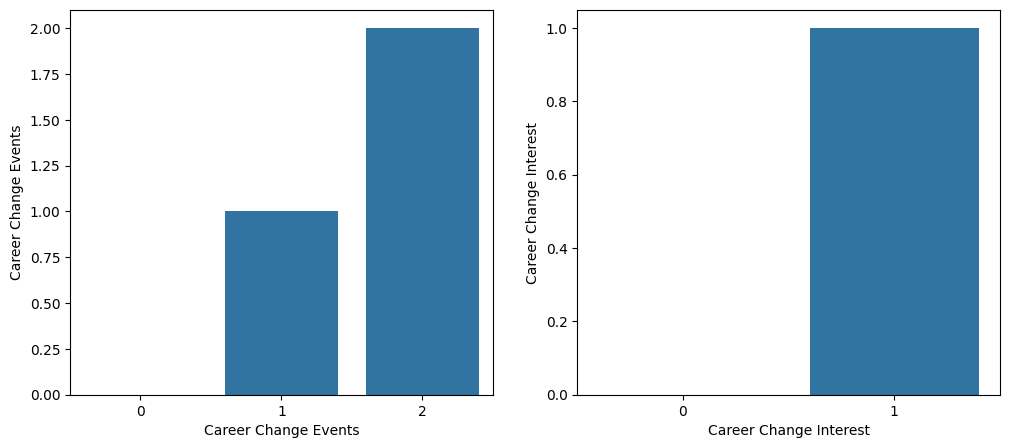

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data, x=data['Career Change Events'], y=data['Career Change Events'], ax=ax[0])
sns.barplot(data, x=data['Career Change Interest'], y=data['Career Change Interest'], ax=ax[1])

I chose to examine these two sections up close because it is interesting to see that every member in this dataset had an interest in changing careers (even if they were rated at different levels, they all have an interest in changing their current job) and the career change events distribution is interesting because there is a substantial bias in determining what event leads to an individual to change their career. It leads me to believe that this model would be better at determining a career change based off of events that correlate to topics that fall under section '2'.

## Model Building
### High Complexity Model

In [15]:
features = data.drop('Likely to Change Occupation', axis=1)
target = data['Likely to Change Occupation']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

* `x_train` - Training features used to fit (train) the model
* `x_test` - Testing features used to test the model
* `y_train` - Training target labels used to fit (train) the model
* `y_test` - Testing target labels used to compare against the model predicited labels

### Grid Search with Cross Validation

In [16]:
# 5-Fold cross validation and shuffle the data
cv = KFold(n_splits=5, shuffle=True)

# Setting up grid search
model = tree.DecisionTreeClassifier()
param_grid = {
  'max_depth': list(range(1, 11)),
  'criterion': ['entropy', 'gini'],
}

grid = GridSearchCV(model, param_grid, cv=5)

y_train

# Performing the grid search
grid.fit(x_train, y_train)

# Print the results
print('Best Parameters: {}'.format(grid.best_params_))

Best Parameters: {'criterion': 'entropy', 'max_depth': 3}


In [17]:
# Prediction and accuracy
pred_test = grid.best_estimator_.predict(x_test)

print('Accuracy of optimal model: {:3.2f}'.format(accuracy_score(y_test, pred_test)))

# Calculate the accuracy of the mode
acc = grid.best_score_
observations = x_test.shape[0]

# 95% confidence interval
lb, ub = classification_confint(acc, observations)

print('Accuracy: {:3.2f} ({:3.2f}, {:3.2f})'.format(acc, lb, ub))

Accuracy of optimal model: 1.00
Accuracy: 1.00 (1.00, 1.00)


The optimal classifier, along with the best set of hyperparameters, was identified as the entropy criterion with a maximum depth of 3. Interestingly, this aligns with the high complexity model, suggesting that the high complexity model is indeed the most suitable choice.

I decided to perform a cross-validation, a critical step in the machine learning process, to ensure the selected model is both robust and generalizes well to unseen data. In this case, the mean accuracy of the best model is identical to that of the high complexity model, with an accuracy score of 100%. Thid conclusively indicates that the high complexity model is the most appropriate for deployment.

Train Accuracy: 1.00
Test Accuracy: 1.00


[Text(0.4, 0.875, 'Job Satisfaction <= 4.5\nentropy = 0.985\nsamples = 23049\nvalue = [9839, 13210]\nclass = Yes'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 9135\nvalue = [0, 9135]\nclass = Yes'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Career Change Interest <= 0.5\nentropy = 0.872\nsamples = 13914\nvalue = [9839.0, 4075.0]\nclass = No'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Salary <= 49981.0\nentropy = 0.523\nsamples = 11153\nvalue = [9839, 1314]\nclass = No'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1314\nvalue = [0, 1314]\nclass = Yes'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 9839\nvalue = [9839, 0]\nclass = No'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2761\nvalue = [0, 2761]\nclass = Yes')]

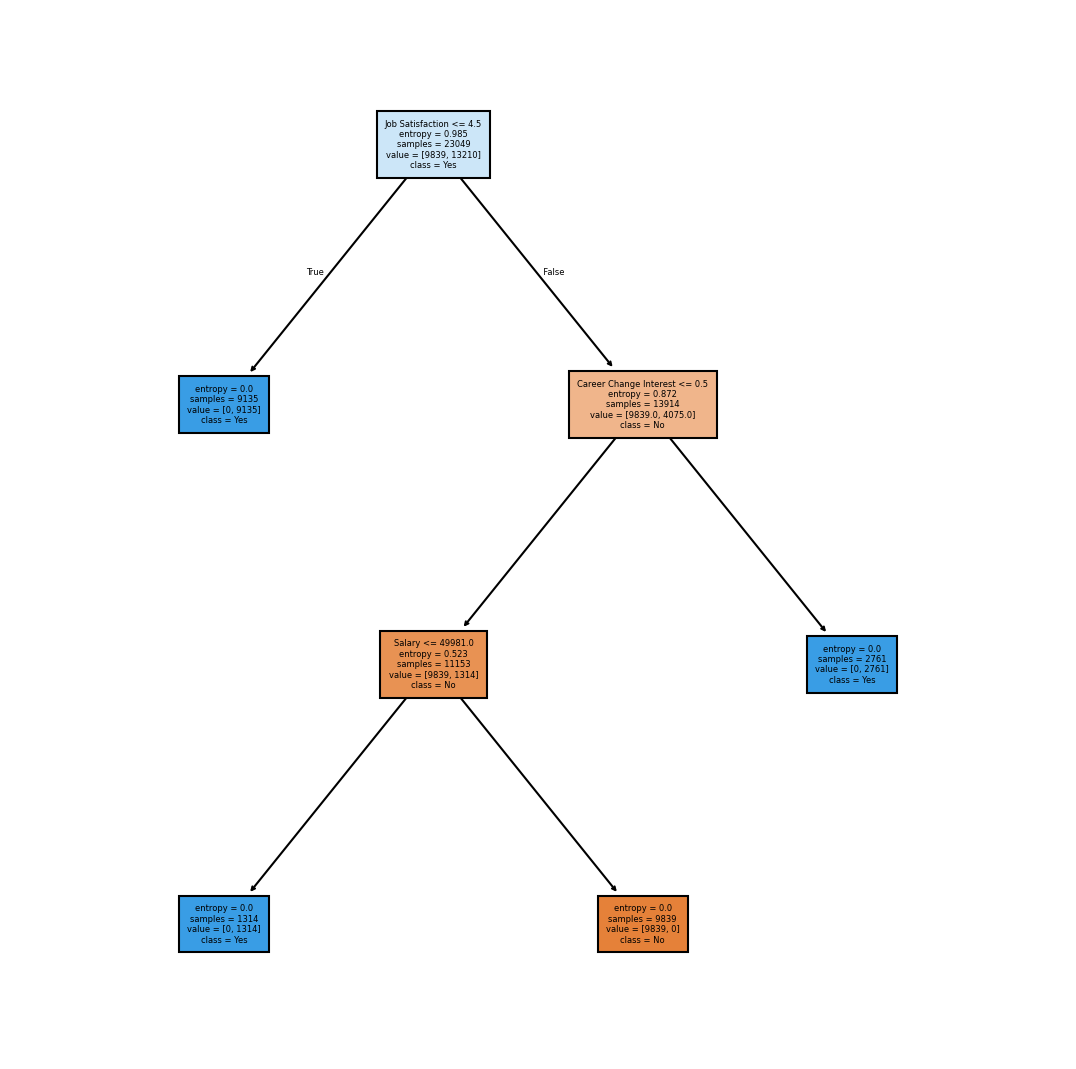

In [18]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)

dtree.fit(x_train, y_train)

pred_train = dtree.predict(x_train)
pred_test = dtree.predict(x_test)

print('Train Accuracy: {:3.2f}'.format(accuracy_score(y_train, pred_train)))
print('Test Accuracy: {:3.2f}'.format(accuracy_score(y_test, pred_test)))

fig, ax = plt.subplots(1, 1, figsize=(9, 9), dpi=150)

plot_tree(dtree, fontsize=4, filled=True, max_depth=3, feature_names=features.columns, class_names=['No', 'Yes'])

The high complexity model, with approximately six comparisons, clearly exhibits a perfect fitting as both training and testing splits have yielded a 100% accuracy. In this case, a medium or low complexity model is not necessary but that does not omit the notion of exploring other models.

[Text(0.4, 0.875, 'Job Satisfaction <= 4.5\nentropy = 0.985\nsamples = 23049\nvalue = [9839, 13210]\nclass = Yes'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 9135\nvalue = [0, 9135]\nclass = Yes'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Career Change Interest <= 0.5\nentropy = 0.872\nsamples = 13914\nvalue = [9839.0, 4075.0]\nclass = No'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Salary <= 49981.0\nentropy = 0.523\nsamples = 11153\nvalue = [9839, 1314]\nclass = No'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1314\nvalue = [0, 1314]\nclass = Yes'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 9839\nvalue = [9839, 0]\nclass = No'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2761\nvalue = [0, 2761]\nclass = Yes')]

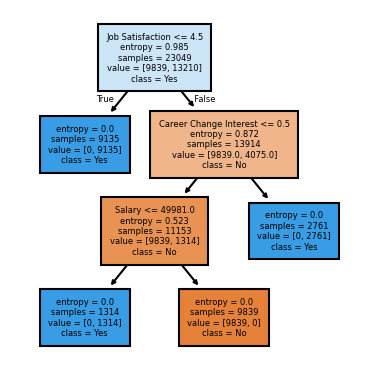

In [19]:
# Visualize the model
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=150)

plot_tree(grid.best_estimator_, fontsize=4, filled=True, max_depth=3, feature_names=features.columns, class_names=['No', 'Yes'])

In [20]:
def model_metrics(y_true, y_predict):
  accuracy = accuracy_score(y_true, y_predict)
  precision = precision_score(y_true, y_predict, average='micro')
  recall = recall_score(y_true, y_predict, average='micro')
  f1 = f1_score(y_true, y_predict, average='micro')
  balanced_accuracy = balanced_accuracy_score(y_true, y_predict)

  return accuracy, precision, recall, f1, balanced_accuracy

In [21]:
# Calculate the model metrics by cpmparing the true training target and teh predicited values
pred_train = dtree.predict(x_train)
pred_test = dtree.predict(x_test)
train_metrics = model_metrics(y_train, pred_train)
test_metrics = model_metrics(y_test, pred_test)
df = pd.DataFrame([train_metrics, test_metrics], columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Balanced Accuracy'], index=['Train', 'Test'])
metric_values = {
  'High Complexity': df,
}

In [22]:
def plot_bar_results(dataset_type, metric_values):
  fig = go.Figure()

  for model_name, metrics_df in metric_values.items():
    metrics_names = list(metrics_df.columns)
    values = metrics_df.loc[dataset_type].to_numpy()

    fig.add_trace(go.Bar(y=values, x=metrics_names, name=model_name))

  fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text=dataset_type + ' Dataset')
  fig.show()

In [23]:
plot_bar_results('Train', metric_values)

In [24]:
plot_bar_results('Test', metric_values)

## Predictive analysis
### kNN Model

In [25]:
# KNN
model = KNeighborsClassifier()

# 5-fold cross validation
cv = KFold(n_splits=5, shuffle=True)

# Grid search
param_grid = {
  'n_neighbors': list(range(1, 26)),
}
grid = GridSearchCV(model, param_grid, cv=cv)

# Performing the grid search
grid.fit(x_train, y_train)

print('Grid Search: best parameters: {}'.format(grid.best_params_))

# Accuracy of best model with confidence interval
pred_test = grid.best_estimator_.predict(x_test)
acc = accuracy_score(y_test, pred_test)
lb, ub = classification_confint(acc, x_test.shape[0])

print('Accuracy: {:3.2f} ({:3.2f}, {:3.2f})'.format(acc, lb, ub))

Grid Search: best parameters: {'n_neighbors': 1}
Accuracy: 0.57 (0.56, 0.59)


### kNN Model Confusion Matrix

In [ ]:
# Confusion matrix
labels = list(target.unique())
cm = confusion_matrix(y_true=y_test, y_pred=pred_test, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print('Confusion Matrix:\n{}'.format(cm_df))

The best k-NN model acieves an accuracy of 57%, with a confidence intereval ranging from 56% to 59%. Overall, this result indicates a substantial lack of accuracy, which tells me that this is not the best model to use for the rest of this analysis as it may either lack sufficient data or be ginficantly affected by biasses within the dataset.

### ANN/MLP

In [ ]:
# Neural network
model = MLPClassifier(hidden_layer_sizes=(60,), max_iter=10000, random_state=1)

# Train and test the model
model.fit(features, target)

predict_y = model.predict(features)
acc = accuracy_score(target, predict_y)
lb, ub = classification_confint(acc, features.shape[0])

print('Accuracy: {:3.2f} ({:3.2f}, {:3.2f})'.format(acc, lb, ub))

### MLP Grid Search

In [ ]:
# Neural network
model = MLPClassifier(max_iter=10000, random_state=1)

"""
Grid Search:

We set up a grid search over the architecture and activation functions
"""
param_grid = {
  'hidden_layer_sizes': [(30,), (60,), (120), (30,30), (30,60), (30, 120), (60,30), (60,60), (60, 120), (120,30), (120,60), (120, 120)],
  'activation': ['relu', 'logistic']
}

# 3-fold cross-validation
grid = GridSearchCV(model, param_grid, cv=3)

grid.fit(features, target)

print('Grid Search: best parameters: {}'.format(grid.best_params_))

# Evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(features)
acc = accuracy_score(target, predict_y)
lb, ub = classification_confint(acc, features.shape[0])

print('Accuracy: {:3.2f} ({:3.2f}, {:3.2f})'.format(acc, lb, ub))

### Model Comaprison
The accuracy of the network I constructed using our rule of thumb was,

`57% (56%, 57%)`

and the accuracy of our network constructed using a grid search was,

`74% (74%, 75%)`

My first observation is that our rule of thumb yielded a very low accuracy score leading me to believe I was working with incoherent and that our rule of thumb is low standard and inaccurate. Constructing a grid search showed me that even while it produced the best parameters for an ANN model, it is too low and subpar for the basis of my research.

### SVM model

In [26]:
# SVM model
model = SVC(max_iter=10000)

# Grid search
param_grid = [
  {
    'C': [1, 10, 100, 1000],
    'kernel': ['linear'],
  },
  {
    'C': [1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf'],
  },
  {
    'C': [1, 10, 100, 1000],
    'degree': ['3'],
    'coef0': ['0.0'],
    'gamma': ['scale'],
    'kernel': ['poly'],
  },
  {
    'C': [1, 10, 100, 1000],
    'gamma': ['scale'],
    'coef0': ['0.0'],
    'kernel': ['sigmoid'],
  }
]

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)

print('Grid Search: best parameters: {}'.format(grid.best_params_))

Grid Search: best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [27]:
# Evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(x_test)
acc = accuracy_score(y_test, predict_y)
lb, ub = classification_confint(acc, features.shape[0])

print('Accuracy: {:3.2f} ({:3.2f}, {:3.2f})'.format(acc, lb, ub))

Accuracy: 0.58 (0.57, 0.59)


In [28]:
# Build the confusion matrix
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
cm = confusion_matrix(y_test, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print('Confusion Matrix:\n{}'.format(cm_df))

Confusion Matrix:
    1  2  3  4  5  6  7  8  9  10  11  12
1   0  0  0  0  0  0  0  0  0   0   0   0
2   0  0  0  0  0  0  0  0  0   0   0   0
3   0  0  0  0  0  0  0  0  0   0   0   0
4   0  0  0  0  0  0  0  0  0   0   0   0
5   0  0  0  0  0  0  0  0  0   0   0   0
6   0  0  0  0  0  0  0  0  0   0   0   0
7   0  0  0  0  0  0  0  0  0   0   0   0
8   0  0  0  0  0  0  0  0  0   0   0   0
9   0  0  0  0  0  0  0  0  0   0   0   0
10  0  0  0  0  0  0  0  0  0   0   0   0
11  0  0  0  0  0  0  0  0  0   0   0   0
12  0  0  0  0  0  0  0  0  0   0   0   0


### Random Forest Classification Model

In [29]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

predict_y = rf.predict(x_test)
acc = accuracy_score(y_test, predict_y)

print('Accuracy score: {:3.2f}'.format(acc))

Accuracy score: 1.00


[Text(0.45454545454545453, 0.9, 'Job Security <= 5.5\ngini = 0.489\nsamples = 14510\nvalue = [9831, 13218]\nclass = 1'),
 Text(0.2727272727272727, 0.7, 'Career Change Interest <= 0.5\ngini = 0.486\nsamples = 7331\nvalue = [4850, 6792]\nclass = 1'),
 Text(0.36363636363636365, 0.8, 'True  '),
 Text(0.18181818181818182, 0.5, 'Job Satisfaction <= 4.5\ngini = 0.499\nsamples = 5845\nvalue = [4850, 4439]\nclass = 0'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 2368\nvalue = [0, 3770]\nclass = 1'),
 Text(0.2727272727272727, 0.3, 'Field of Study <= 6.5\ngini = 0.213\nsamples = 3477\nvalue = [4850, 669]\nclass = 0'),
 Text(0.18181818181818182, 0.1, '\n  (...)  \n'),
 Text(0.36363636363636365, 0.1, '\n  (...)  \n'),
 Text(0.36363636363636365, 0.5, 'gini = 0.0\nsamples = 1486\nvalue = [0, 2353]\nclass = 1'),
 Text(0.6363636363636364, 0.7, 'Job Satisfaction <= 4.5\ngini = 0.492\nsamples = 7179\nvalue = [4981.0, 6426.0]\nclass = 1'),
 Text(0.5454545454545454, 0.8, '  False'),
 Text(0.545

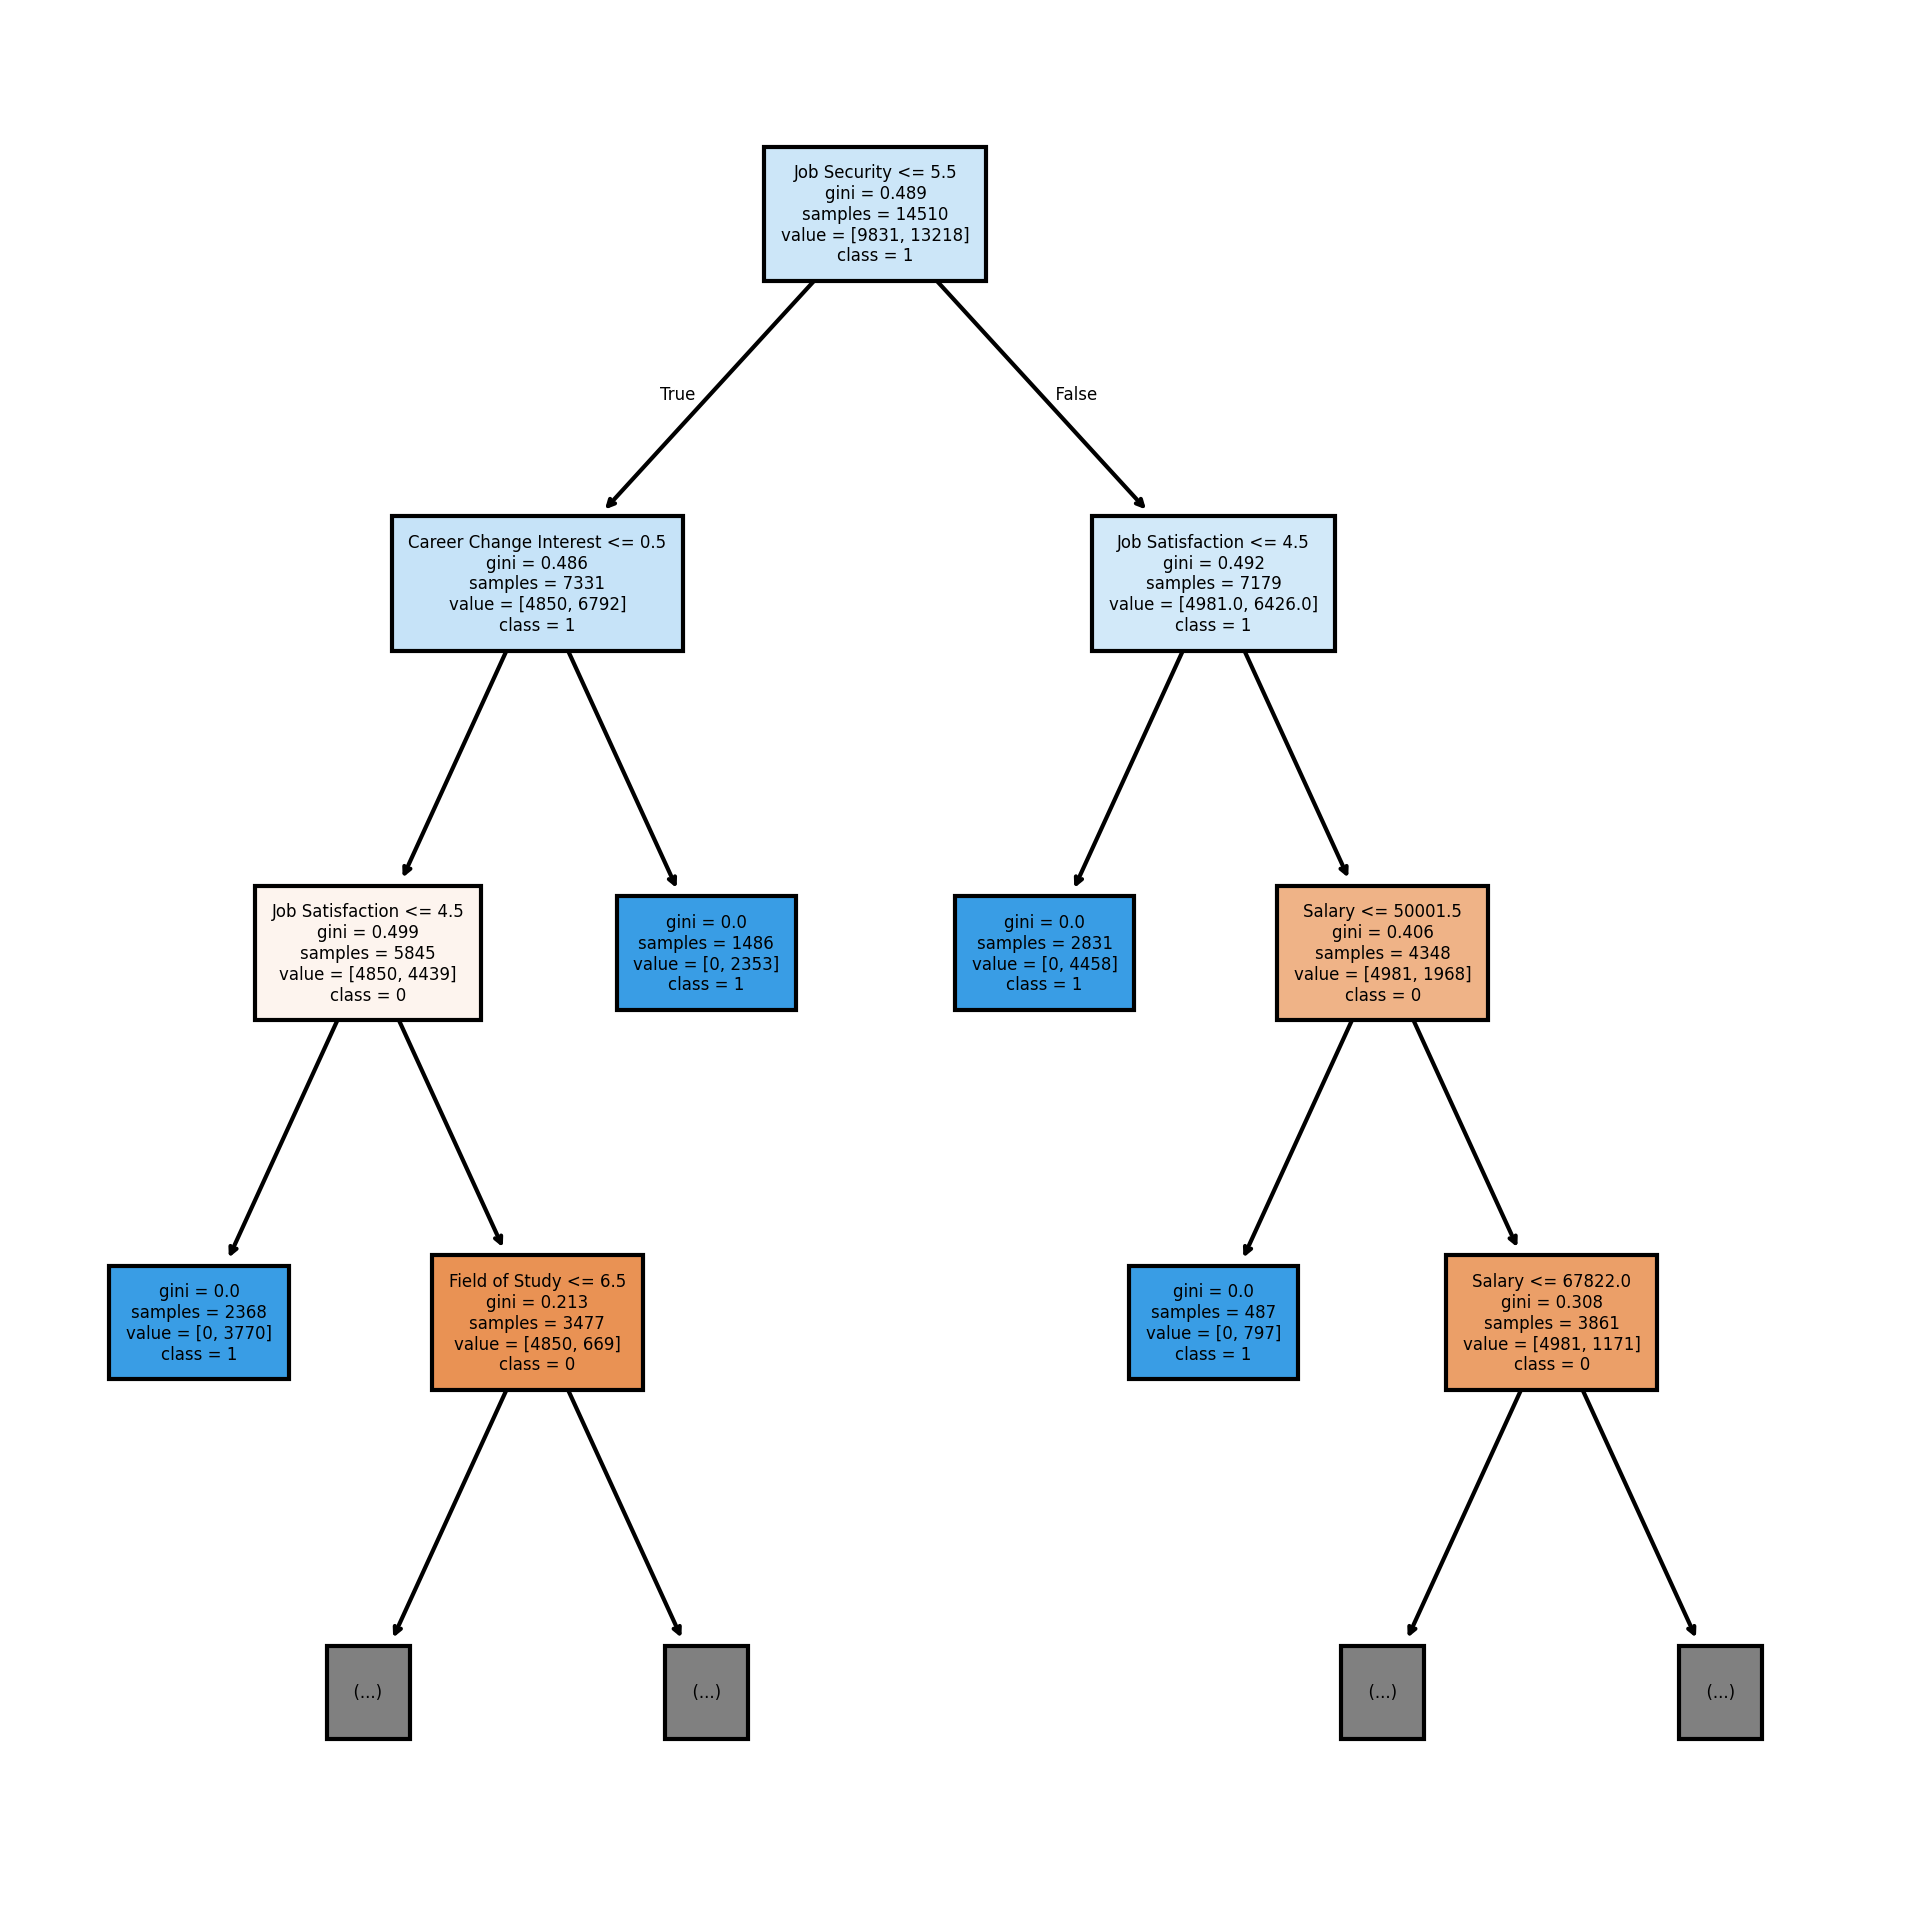

In [30]:
# Visualizing the results
fig, axes = plt.subplots(1, 1, figsize=(8, 8), dpi=300)

plot_tree(decision_tree=rf.estimators_[0], fontsize=4, filled=True, max_depth=3, feature_names=features.columns, class_names=['0', '1']) # 0-No, 1-Yes

### Comparing the Best Models
My best models for this project were the Random Forest and MLP models. These two models produced the highest accuracy score than the other four. In this case, the best model to go with would be the Random Forest model because not only does it take less than a minute to complete, it produced a 100% accuracy score on this dataset. Where as the MLP model, while still providing a high accuracy score of 74%, took over five minutes to produce an output.

## Conclusion
Throughout this analysis, both graphs and associated models have confirmed parts of my hypothesis both showing me more indepth or other aspects I haven't realized that actually play an influence. In this report, I have concluded that skills gap, job satisfaction, salary, job security, and family influence all play a role in determining whether or not an individual will change their career or not.